# Analysis

In [2]:
import os
import bokeh
from bokeh.plotting import show
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

import flowkit as fk
import seaborn as sns
import matplotlib.pyplot as plt

bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
#load in patient dataset
data = pd.read_csv("patient_data.csv")
data

,Subject Accession,H1,H3,B,FCS Raw,FCS Preprocessed,WSP File
0,SUB120420,64,16,16,Panel_L1_A1_L1_110194_PBMC_10112011_A01.580227...,export_Panel_L1_A1_L1_110194_PBMC_10112011_A01...,Panel_L1_Run_2.804556.wsp
1,SUB120423,256,16,16,Panel_L1_A2_L1_110197_PBMC_10112011_A02.579447...,export_Panel_L1_A2_L1_110197_PBMC_10112011_A02...,Panel_L1_Run_1.804538.wsp
2,SUB120445,64,8,32,Panel_L1_A3_L1_110243_PBMC_10172011_A03.578999...,export_Panel_L1_A3_L1_110243_PBMC_10172011_A03...,Panel_L1_Run_4.804574.wsp
3,SUB120446,1024,256,64,Panel_L1_A1_L1_110244_PBMC_10172011_A01.579604...,export_Panel_L1_A1_L1_110244_PBMC_10172011_A01...,Panel_L1_Run_5.804583.wsp
4,SUB120449,1024,128,64,Panel_L1_E3_L1_110247_PBMC_10172011_E03.580335...,export_Panel_L1_E3_L1_110247_PBMC_10172011_E03...,Panel_L1_Run_4.804574.wsp
5,SUB120450,64,32,16,Panel_L1_E1_L1_110248_PBMC_10172011_E01.578572...,export_Panel_L1_E1_L1_110248_PBMC_10172011_E01...,Panel_L1_Run_5.804583.wsp
6,SUB120452,128,128,128,Panel_L1_A2_L1_110250_PBMC_10172011_A02.579307...,export_Panel_L1_A2_L1_110250_PBMC_10172011_A02...,Panel_L1_Run_5.804583.wsp
7,SUB120457,128,128,32,Panel_L1_E2_L1_110255_PBMC_10172011_E02.580138...,export_Panel_L1_E2_L1_110255_PBMC_10172011_E02...,Panel_L1_Run_5.804583.wsp
8,SUB120458,256,64,32,Panel_L1_A3_L1_110256_PBMC_10172011_A03.579670...,export_Panel_L1_A3_L1_110256_PBMC_10172011_A03...,Panel_L1_Run_5.804583.wsp
9,SUB120459,128,32,64,Panel_L1_A1_L1_110257_PBMC_10172011_A01.580299...,export_Panel_L1_A1_L1_110257_PBMC_10172011_A01...,Panel_L1_Run_6.804592.wsp


In [4]:
#Sample Extraction Function
def extractFCSDF(fileName, source = "Raw"):
    path = ""
    if source == "Preprocessed":
        path = os.path.join("FCS/Preprocessed", fileName)
    else:
        path = os.path.join("FCS/Raw", fileName)
    sample = fk.Sample(path)
    return sample.as_dataframe(source = "raw")

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_values = []
Y_values = []

for index, row in data.iterrows():
    fileName = row['FCS Raw']
    sample_df = extractFCSDF(fileName, source="Raw")
    
    subject_features = sample_df.mean(axis=0)
    X_values.append(subject_features.values)
    
    Y_values.append([row["H1"], row["H3"], row["B"]])

X = np.array(X_values)
y = np.array(Y_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = MultiOutputClassifier(
    LogisticRegression(max_iter=2000, random_state=10)
)
classifier.fit(X_train_scaled, y_train)

for i, target_name in enumerate(['H1', 'H3', 'B']):
    accuracy = classifier.estimators_[i].score(X_test_scaled, y_test[:, i])
    print(f"Accuracy for {target_name}: {accuracy:.3f}")

# Calculate F1 score 
for i, target_name in enumerate(['H1', 'H3', 'B']):
    print(classifier.estimators_[i].predict(X_test_scaled))
    print(y_test[:, i])
    f1 = f1_score(y_test[:, i], classifier.estimators_[i].predict(X_test_scaled), average='weighted')
    print(f"F1 score for {target_name}: {f1:.3f}")




Accuracy for H1: 0.000
Accuracy for H3: 0.000
Accuracy for B: 0.500
[1024   64  256  256]
[128 256  64 128]
F1 score for H1: 0.000
[256   8  64  64]
[128  64  32 128]
F1 score for H3: 0.000
[32 64 32 32]
[ 32  64  16 128]
F1 score for B: 0.375


In [ ]:
class CellTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, dropout=0.1):
        super(CellTransformer, self).__init__()
        # Embed each cell's features into a higher-dimensional space.
        self.embedding = nn.Linear(input_dim, embed_dim)
        
        # Define a stack of transformer encoder layers.
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # After aggregating the transformer output, use a linear layer to map to the HAI titer.
        self.output_linear = nn.Linear(embed_dim, 1)  # Output a single value (regression)
        
    def forward(self, x):
        # x: (batch_size, seq_len, input_dim) where seq_len is the number of cells per sample.
        # Embed the input features.
        x = self.embedding(x)  # Now x has shape: (batch_size, seq_len, embed_dim)
        
        # Transformer modules expect input shape (seq_len, batch_size, embed_dim)
        x = x.transpose(0, 1)
        
        # Process the sequence with the transformer encoder.
        x = self.transformer_encoder(x)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        x = x.transpose(0, 1)
        
        # Aggregate the encoded features across the sequence (cells). Here we use the mean.
        x = x.mean(dim=1)  # Resulting shape: (batch_size, embed_dim)
        
        # Map the aggregated features to a predicted HAI titer.
        out = self.output_linear(x)  # Final shape: (batch_size, 1)
        return out

# Each cell is described by 7 features: [CD4, CCR7, CD3, CD45RA, HLADR, scatter, viability]
input_dim = 7    # Number of features per cell.
embed_dim = 64   # Embedding dimension for the transformer.
num_heads = 4    # Number of attention heads.
num_layers = 3   # Number of transformer encoder layers.

model = CellTransformer(input_dim, embed_dim, num_heads, num_layers)
print(model)


CellTransformer(
  (embedding): Linear(in_features=7, out_features=64, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output_linear): Linear(in_features=64, out_features=1, bias=True)
)


C:\Users\grego\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Using device: cuda
Processing sample 1/20
Processing sample 2/20
Processing sample 3/20
Processing sample 4/20
Processing sample 5/20
Processing sample 6/20
Processing sample 7/20
Processing sample 8/20
Processing sample 9/20
Processing sample 10/20
Processing sample 11/20
Processing sample 12/20
Processing sample 13/20
Processing sample 14/20
Processing sample 15/20
Processing sample 16/20
Processing sample 17/20
Processing sample 18/20
Processing sample 19/20
Processing sample 20/20
      Subject  Predicted_Value    H1   H3    B
0   SUB120420        -0.432385    64   16   16
1   SUB120423        -0.607819   256   16   16
2   SUB120445        -0.125131    64    8   32
3   SUB120446        -0.245535  1024  256   64
4   SUB120449        -0.218674  1024  128   64
5   SUB120450        -0.250810    64   32   16
6   SUB120452        -0.283486   128  128  128
7   SUB120457        -0.139869   128  128   32
8   SUB120458        -0.605404   256   64   32
9   SUB120459        -0.000180   128   3

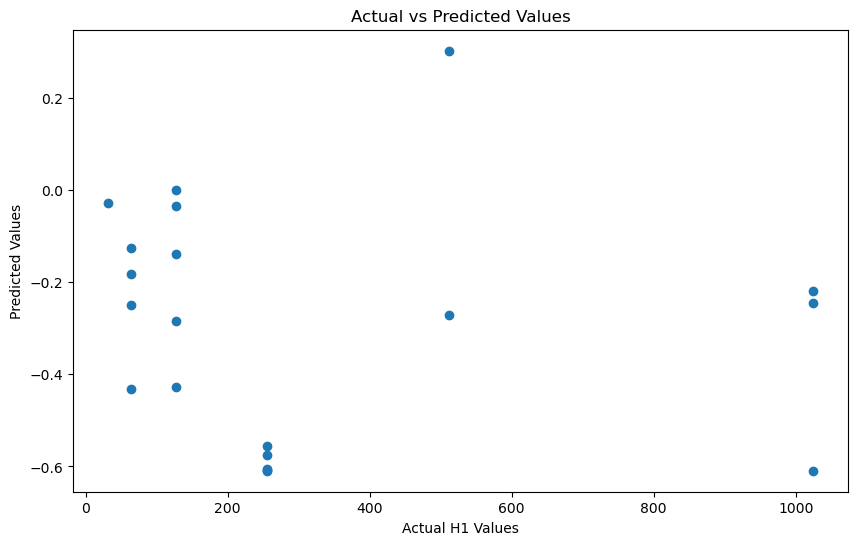

In [ ]:
# Set device to GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)

results = []

selected_features = [
    ('PerCP-Cy5-5-A', 'CD4'),   # CD4
    ('PE-A', 'CCR7'),           # CCR7
    ('V450-A', 'CD3'),          # CD3
    ('PE-Cy7-A', 'CD45RA'),     # CD45RA
    ('V500-A', 'HLA-DR'),       # HLA-DR
    ('FSC-A', ''),              # FSC-A
    ('SSC-A', '')               # SSC-A
]

for index, row in data.iterrows():

  sample_df = extractFCSDF(row['FCS Raw'], source="Raw")
  
  features = sample_df[selected_features].values
  
  # Convert to tensor and add batch dimension
  features_tensor = torch.FloatTensor(features)
  features_tensor = features_tensor.unsqueeze(0)  # Add batch dimension
  features_tensor = features_tensor.to(device)

  print(f"Processing sample {index + 1}/{len(data)}")
  
  with torch.no_grad():
    output = model(features_tensor)
    
  results.append({
    'Subject': row['Subject Accession'],
    'Predicted_Value': output.item(),
    'H1': row['H1'],
    'H3': row['H3'],
    'B': row['B']
  })
  torch.cuda.empty_cache()

results_df = pd.DataFrame(results)
print(results_df)

# so obviously idk if this is right or not to compare?
plt.figure(figsize=(10, 6))
plt.scatter(results_df['H1'], results_df['Predicted_Value'])
plt.xlabel('Actual H1 Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()